# Gesture model training

## Data Reading

This section reads the data from the sensors. The data is stored in two .csv files, Measurement.cs and Batch.csv <br>
Measurement.csv contains the actual values of rotation and acceleration. Each gesture has 100 tim

In [1]:
import pandas as pd

ms = pd.read_csv("measurement_db-Measurement.csv")
ms

,id,batchId,xRotation,yRotation,zRotation,xAcceleration,yAcceleration,zAcceleration
0,1,2,0.004261,0.004527,0.000533,0.319741,0.886541,9.669696
1,2,2,0.004261,0.004527,0.000533,0.307777,0.879362,9.731909
2,3,2,0.004261,0.004527,0.000533,0.269492,0.872184,9.748808
3,4,2,0.002397,0.002796,0.003196,0.348455,0.853041,9.767951
4,5,2,0.002397,0.002796,0.003196,0.331705,0.848256,9.765558
...,...,...,...,...,...,...,...,...
62095,62096,626,-0.259251,-0.094140,0.111317,-0.954736,0.929612,9.662517
62096,62097,626,-0.259251,-0.094140,0.111317,-1.026521,0.891326,9.686445
62097,62098,626,-0.259251,-0.094140,0.111317,-0.983450,0.699602,9.763165
62098,62099,626,-0.259251,-0.094140,0.111317,-0.923480,0.584746,9.808629


The Batch.csv contains the id of the batch and the type of the gesture: <br> 
0 -> Up and down <br>
1 -> Left and right <br>
2 -> Rotation

In [2]:
bt = pd.read_csv("measurement_db-Batch.csv")
bt

,id,type
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
621,622,2
622,623,2
623,624,2
624,625,2


## Data preparing

This section prepares the data in order to feed it to the neural network model. <br>
Firstly, we concatenate all the values from the table, and we will organise the data in two columns with gesture's type and it's 100 measures.

In [3]:
import numpy as np
data = pd.DataFrame(columns=['type', 'sensors'])
for i in set(ms['batchId'].tolist()):
    allMeasurements = ms.loc[ms['batchId'] == i]
    filtered = allMeasurements.drop('id', inplace=False, axis=1).drop('batchId', inplace=False, axis=1).to_numpy()
    #filtered = allMeasurements.to_numpy()
    #print(allMeasurements[0])
    #print(filtered)
    flat = filtered.flatten()
    batchType = bt.loc[bt['id'] == i].iat[0,1]
    data.loc[len(data)] = {
    "type": batchType,
    "sensors": filtered
    }
data

,type,sensors
0,0,"[[0.0042609320953488, 0.0045272405259311, 0.00..."
1,0,"[[-0.0555252730846405, -0.0154458787292242, 0...."
2,0,"[[-0.0061250897124409, 0.0034620072692632, -0...."
3,0,"[[-0.0271634422242641, -0.0018641578499227, 0...."
4,0,"[[-0.0051930109038949, -0.0071903229691088, 0...."
...,...,...
616,2,"[[-0.0585878156125545, 0.0190410409122705, 0.0..."
617,2,"[[-0.1560566425323486, -0.0211715064942836, 0...."
618,2,"[[-0.026231363415718, 0.0113181006163358, 0.01..."
619,2,"[[-0.0013315412215888, 0.0091876350343227, 0.0..."


Now, we split the data into training and test.

In [4]:
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = np.stack(data['sensors'].values)
y = data['type']

# X = np.array(data['sensors'].tolist())
# y = np.array(data['type'])
# X = X.reshape(X.shape[0], -1)

# X = data['sensors']
# y = data['type']
#X_train, X_test, y_train, y_test = train_test_split(data["sensors"].to_numpy(), data["type"].to_numpy(), test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(data["sensors"], data["type"], test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test)
print(y_test)

[[[ 1.19838715e-02  1.58453416e-02 -1.86415785e-03  5.54536641e-01
   -5.38833737e-01  9.74387264e+00]
  [ 1.19838715e-02  1.58453416e-02 -1.86415785e-03  5.49750984e-01
   -4.31007177e-01  9.87323475e+00]
  [ 1.19838715e-02  1.58453416e-02 -1.86415785e-03  4.20389026e-01
   -4.57328230e-01  9.85648537e+00]
  ...
  [-8.92132614e-03 -2.74297502e-02 -8.25555623e-03  2.43021056e-01
   -1.04671037e+00  1.14975128e+01]
  [-8.92132614e-03 -2.74297502e-02 -8.25555623e-03  3.12562466e-01
   -3.06430846e-01  1.11022482e+01]
  [-8.92132614e-03 -2.74297502e-02 -8.25555623e-03  6.02393091e-01
   -4.35792834e-01  9.94516945e+00]]

 [[-2.78292131e-02 -4.79354849e-03 -1.58453416e-02 -5.28215587e-01
    6.72981367e-02  9.68405247e+00]
  [-2.78292131e-02 -4.79354849e-03 -1.58453416e-02 -4.66002196e-01
    4.93519660e-03  9.79187870e+00]
  [-2.78292131e-02 -4.79354849e-03 -1.58453416e-02 -4.01396006e-01
   -4.66899514e-01  1.01080303e+01]
  ...
  [-1.04925454e-01 -3.48863825e-02  1.33154128e-04 -1.71385

## Model training

This section covers the model training process.

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten

import tensorflow as tf

#X_train = np.asarray(X_train.array).astype('float32')
# define the model
model = Sequential()
model.add(Input(shape = (100,6)))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax')) 

# compile the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=40, validation_split=0.1)

Epoch 1/10
12/12 [==============================] - 1s 16ms/step - loss: 1.2511 - accuracy: 0.3610 - val_loss: 0.7858 - val_accuracy: 0.6400
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5437 - accuracy: 0.8408 - val_loss: 0.3875 - val_accuracy: 0.9400
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.2711 - accuracy: 0.9686 - val_loss: 0.1716 - val_accuracy: 0.9800
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.9776 - val_loss: 0.0875 - val_accuracy: 0.9800
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0855 - accuracy: 0.9865 - val_loss: 0.0489 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0509 - accuracy: 0.9933 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9955 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 8/10
12/12 [=

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100, 20)           140       
                                                                 
 dense_1 (Dense)             (None, 100, 5)            105       
                                                                 
 flatten (Flatten)           (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 1,748
Trainable params: 1,748
Non-trainable params: 0
_________________________________________________________________


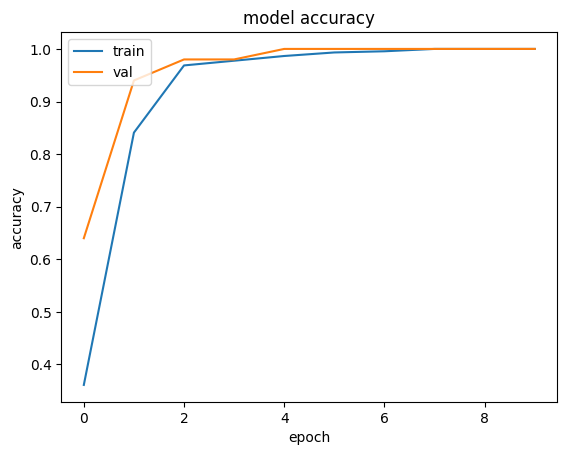

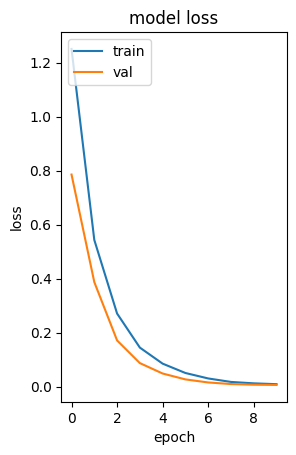

In [19]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.subplot(1,2,1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 1.0000


In [10]:
X = np.array(data['sensors'].tolist())
y = data['type']
X = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_dim=600))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# compile the model
model2.compile(loss='binary_crossentropy', metrics=['accuracy'] ,optimizer='adam')

# train the model
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=40, validation_split=0.1)


Epoch 1/50
7/7 [==============================] - 1s 23ms/step - loss: 0.4072 - accuracy: 0.8889 - val_loss: 3.5964e-05 - val_accuracy: 1.0000
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 0.9928 - val_loss: 1.1466e-04 - val_accuracy: 1.0000
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 0.9964 - val_loss: 1.3819e-04 - val_accuracy: 1.0000
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 8.8869e-05 - val_accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 8.0312e-04 - accuracy: 1.0000 - val_loss: 8.3208e-05 - val_accuracy: 1.0000
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 4.7549e-04 - accuracy: 1.0000 - val_loss: 6.6587e-05 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 3.2751e-04 - accuracy: 1.0000 - val_loss: 7.0573e-05 - val_accuracy: 

In [11]:
loss, accuracy = model2.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 8.0495e-04 - accuracy: 1.0000


In [24]:
from sklearn.ensemble import RandomForestClassifier
X = np.array(data['sensors'].tolist())
y = np.array(data['type'])

# Flatten each vector in each data point into a single row
X = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9523809523809523


In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9285714285714286


## Model exporting

This section is used to convert the keras model to a tensor flow lite model in order to be imported into the watch application.

In [87]:
import tensorflow as tf

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model_100_6.tflite', 'wb') as f:
  f.write(tflite_model)

2023-04-30 15:51:11.930669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'dense_108_input' with dtype float and shape [?,100,6]
	 [[{{node dense_108_input}}]]
2023-04-30 15:51:11.979028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'dense_108_input' with dtype float and shape [?,100,6]
	 [[{{node dense_108_input}}]]
2023-04-30 15:51:11.996050: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100

INFO:tensorflow:Assets written to: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmpeddfqf9z/assets


INFO:tensorflow:Assets written to: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmpeddfqf9z/assets
2023-04-30 15:51:16.652266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'serving_default_dense_108_input' with dtype float and shape [?,100,6]
	 [[{{node serving_default_dense_108_input}}]]
2023-04-30 15:51:16.878116: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-04-30 15:51:16.878132: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-04-30 15:51:16.878353: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmpeddfqf9z
2023-04-30 15:51:16.880420: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { se

In [88]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="model_100_6.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 100   6] <class 'numpy.float32'>

1 output(s):
[1 3] <class 'numpy.float32'>
